In [34]:
import pandas as pd #importando o pandas

# Analisando notas em geral

In [35]:
notas = pd.read_csv('./movie-lens/ratings.csv') #lendo um arquivo csv
notas.head() #mostrando os 5 primeiros resultados 

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [36]:
notas.shape #forma da matriz

(100836, 4)

In [37]:
notas.columns =  ['usuario_id', 'filme_id', 'nota', 'momento' ] #trocando o nome das colunas
notas.head()

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [38]:
notas['nota'].unique() #resgatando valores únicos

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [39]:
notas['nota'].value_counts() #contando a quantidade de cada valor

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [40]:
print('Media', notas['nota'].mean()) #media
print('Mediana', notas['nota'].median()) #mediana

Media 3.501556983616962
Mediana 3.5


<AxesSubplot:ylabel='Frequency'>

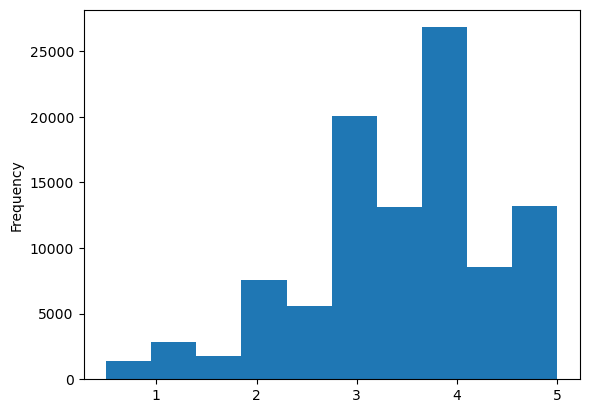

In [41]:
notas.nota.plot(kind='hist') #gráfico de histograma

In [42]:
notas.nota.describe() #resumo dos dados

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [43]:
import seaborn as sns

<AxesSubplot:xlabel='nota'>

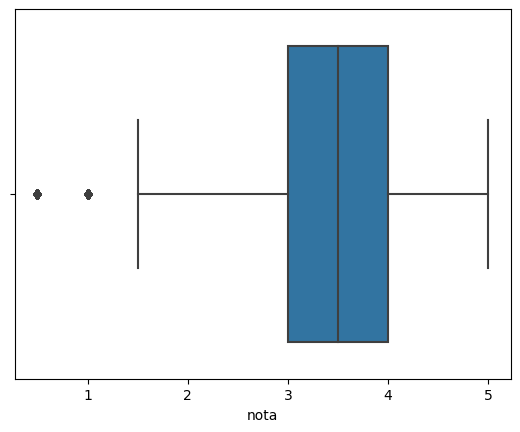

In [44]:
sns.boxplot(x=notas.nota)

# Carregando filmes

In [45]:
filmes = pd.read_csv('./movie-lens/movies.csv')
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

In [46]:
notas.query('filme_id==1').nota.mean()

3.9209302325581397

In [47]:
notas.query('filme_id==2').nota.mean()

3.4318181818181817

In [48]:
medias_por_filme = notas.groupby('filme_id').nota.mean()
medias_por_filme.head()

filme_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

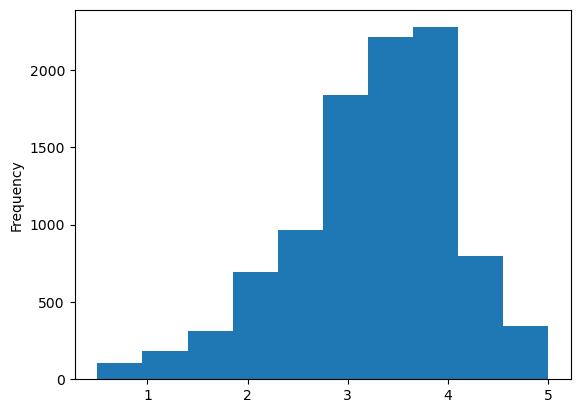

In [49]:
medias_por_filme.plot(kind='hist')

<AxesSubplot:ylabel='nota'>

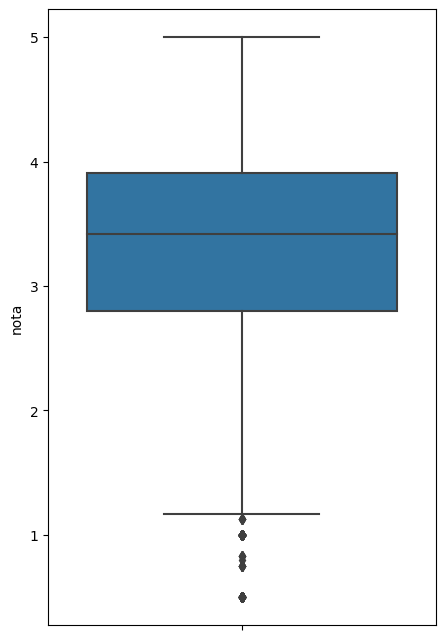

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme)

In [51]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

c:\Users\Caio Fuzita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

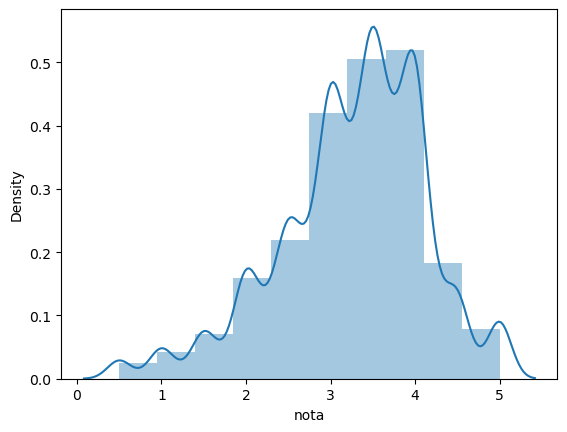

In [52]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

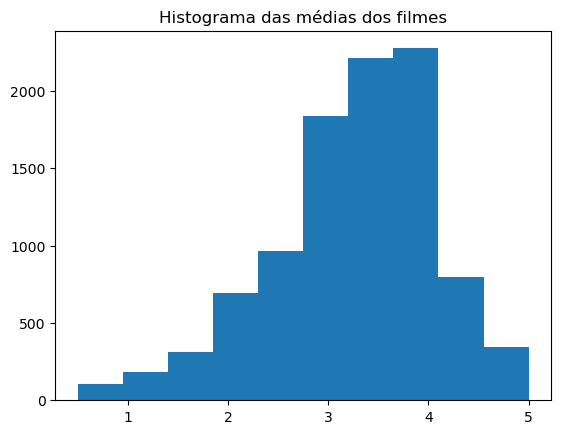

In [53]:
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

# Importando dados do TMDB

In [54]:
tmdb = pd.read_csv('./tmdb/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [55]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [56]:
contagem_idioma = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_idioma.columns = ['original_language', 'total']
contagem_idioma.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

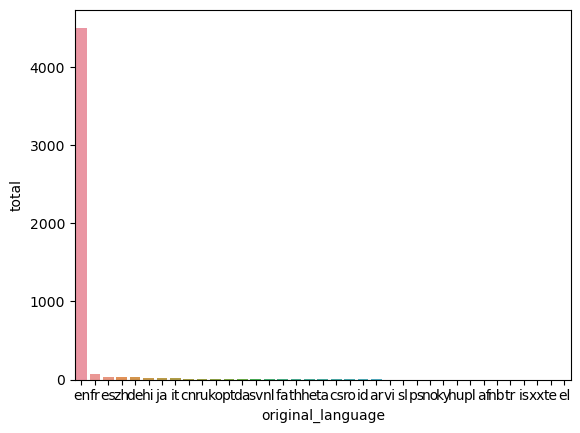

In [57]:
sns.barplot(x='original_language', y='total', data=contagem_idioma)

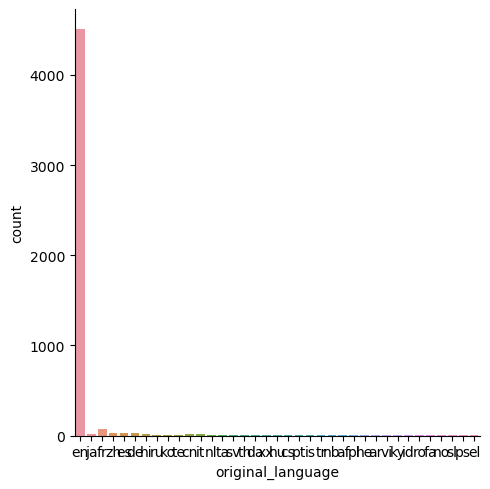

In [58]:
sns.catplot(x='original_language', kind='count', data=tmdb)

([<matplotlib.patches.Wedge at 0x1ffd6953460>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

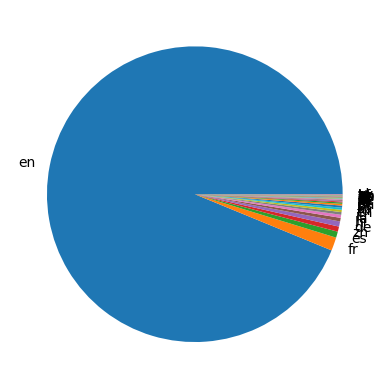

In [59]:
plt.pie(contagem_idioma.total, labels=contagem_idioma.original_language)

In [60]:
total_lingua = tmdb['original_language'].value_counts()

total_geral = total_lingua.sum()
total_ingles = total_lingua.loc['en']
total_resto = total_geral - total_ingles


print(total_ingles, total_resto)

4505 298


<AxesSubplot:xlabel='lingua', ylabel='total'>

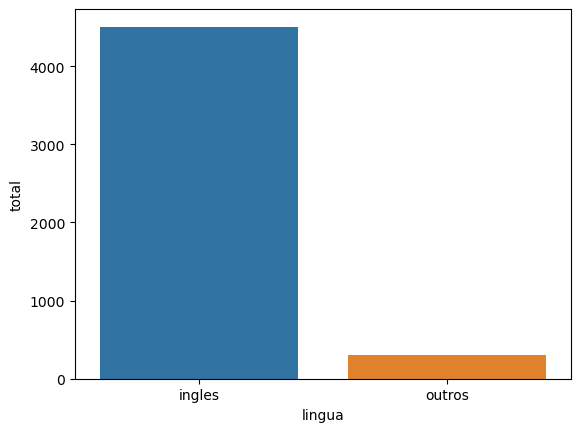

In [61]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_ingles, total_resto]
}

dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data = dados)



([<matplotlib.patches.Wedge at 0x1ffd6a86ac0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

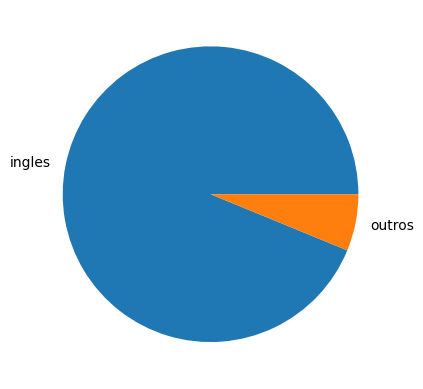

In [62]:
plt.pie(dados.total, labels=dados.lingua)

In [63]:
total_nao_ingles = tmdb.query('original_language != "en"').original_language.value_counts()
total_nao_ingles

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

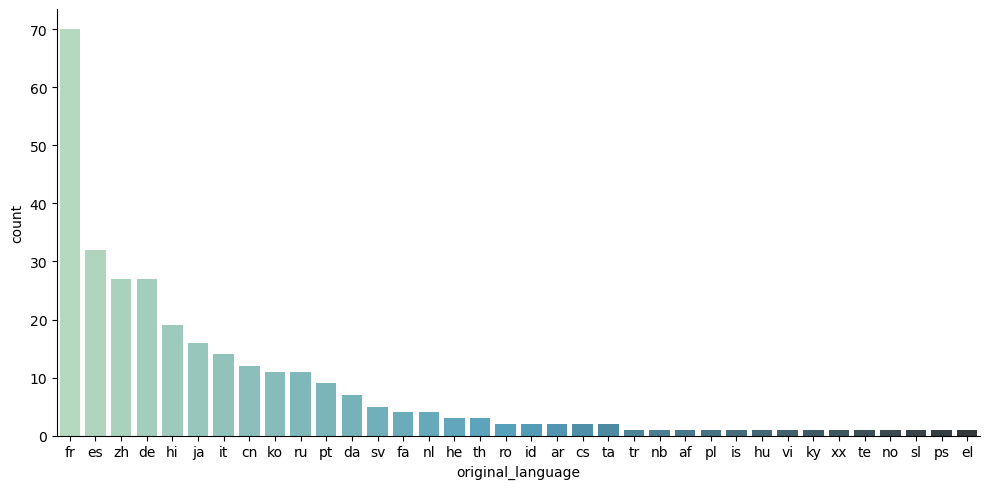

In [64]:
nao_ingles = tmdb.query('original_language != "en"')
sns.catplot(x='original_language', 
            kind='count', 
            data=nao_ingles,
            aspect=2,
            order=total_nao_ingles.index,
            palette='GnBu_d')


# Média, mediana, desvio padrão

In [65]:
filmes.head(2)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [66]:
notas_toy_story = notas.query('filme_id == 1')
notas_jumanji = notas.query('filme_id == 2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [67]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [68]:
print("Nota mediana do Toy Story %.2f" % notas_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


# Importando o Numpy

In [69]:
import numpy as np

array_1 = np.array([2.5] * 10)

In [70]:
array_1.mean()

2.5

In [71]:
filme_1 = np.append(np.array([2.5]* 10), np.array([3.5] * 10))
filme_2 = np.append(np.array([5]* 10), np.array([1] * 10))

In [72]:
print(filme_1.mean(), filme_2.mean())

3.0 3.0


In [73]:
print(np.median(filme_1), np.median(filme_2))

3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

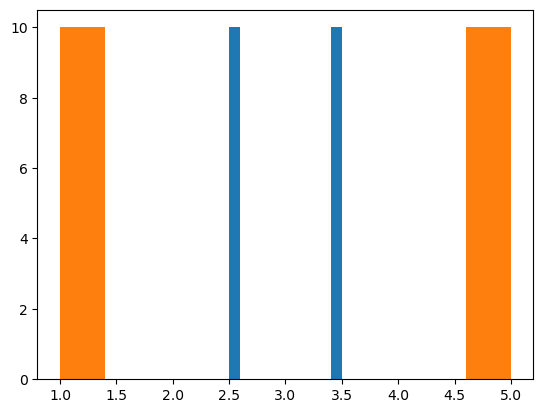

In [74]:
plt.hist(filme_1)
plt.hist(filme_2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffd6c28f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffd6c36550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffd6c28ca0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ffd6c36af0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ffd6c36dc0>,
 'means': []}

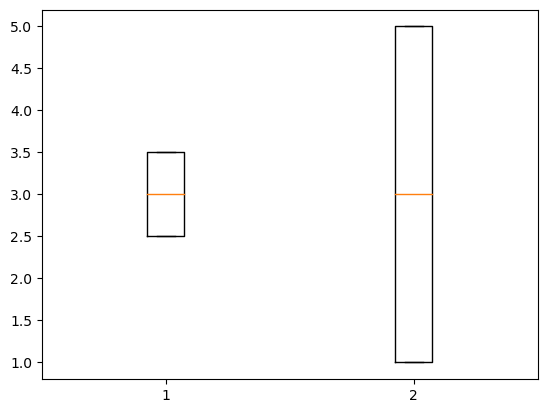

In [75]:
plt.boxplot([filme_1, filme_2])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffd6c97b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffd6ca8160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffd6c978e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ffd6ca8700>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ffd6ca89d0>,
 'means': []}

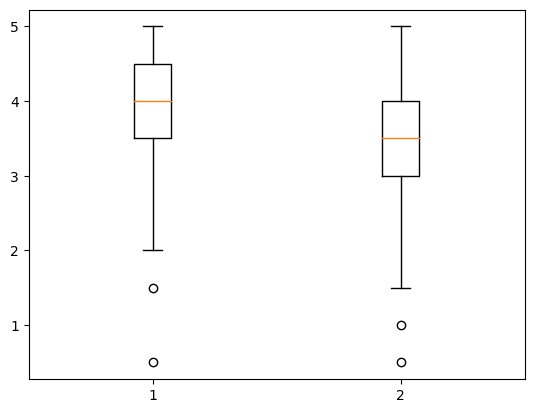

In [76]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<AxesSubplot:xlabel='filme_id', ylabel='nota'>

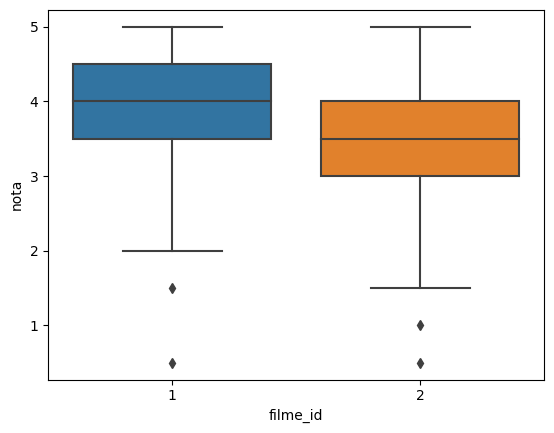

In [77]:
sns.boxplot(x = "filme_id", y = "nota", data = notas.query("filme_id in (1,2)"))

<AxesSubplot:xlabel='filme_id', ylabel='nota'>

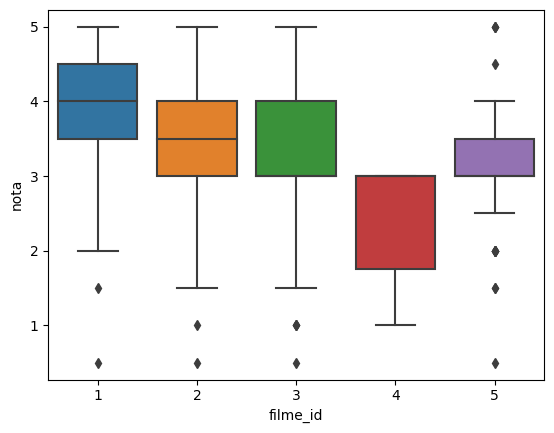

In [78]:
sns.boxplot(x = "filme_id", y = "nota", data = notas.query("filme_id in (1,2,3,4,5)"))

In [79]:
print("Desvio padrão do Jumanji %.2f" % notas_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_toy_story.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [80]:
print('media', np.mean(filme_1), np.mean(filme_2))
print('desvio padrao', np.std(filme_1), np.std(filme_2))
print('mediana', np.median(filme_1), np.median(filme_2))

media 3.0 3.0
desvio padrao 0.5 2.0
mediana 3.0 3.0
